# Ensenble
#### Intuition
Ensenble: 여러 개의 모델을 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용. 비 앙상블 모형에 비해 높은 안정성을 보임.  
![title](bagging_boosting.png)

## Bagging(Bootstrap aggregating)
![title](RF_bagging.png)
  - 샘플을 여러번 뽑아와(bootstrap) 각각의 모델을 학습시킨 결과물을 결합(aggregating)하는 방법. 
    - bootstrap: 훈련 데이터 셋에서 중복을 허용하여 원래 데이터 셋과 같은 크기의 데이터 셋을 만드는 과정.
  - 병렬적 모형 결합.(각 모형의 결과를 다수결을 통해 선택.)
  - 일반적으로 성능이 좋은 모형 생성.(부스팅보다 낮은 성능) 
  - 예) Classification 문제: 생성된 10개의 Decision Tree 모형으로 예측값을 구한 뒤 투표를 통해 최종 결과를 반환. 



## Boosting
![title](boosting.png)
  - 가중치를 활용하여 약한 학습기(모형)을 가중치로 연결하는 방법.
  - 순차적 모형 결합.(n-1번째 약한 모형이 잘못 예측한 데이터에 가중치를 부여하여 n번째 약한 모형 학습시 활용.)
  - 맞추기 어려운 결과를 맞추는데 초점.(오버피팅 가능성)



### Bagging vs. Boosting training set  
![title](Bagging_vs_Boosting_training_set.png)


reference.  
https://becominghuman.ai/ensemble-learning-bagging-and-boosting-d20f38be9b1e  
https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting  
https://swalloow.github.io/bagging-boosting/  
https://www.youtube.com/watch?v=HZg8_wZPZGU  

# Adaboost

#### Adaboost Intuition

- Adaptive Boost
- 약한 학습기의 오류 데이터에 가중치를 증가시키켜 다음 모형이 오류 데이터셋 분류 성능을 높이는 방향으로 순차적으로 모형을 개선하는 알고리즘.
  - 약한 학습기: Weak learner. Slightly bettern than random guessing. error < 0.5
  - decision tree(depth=1, aka. stump tree)를 약한 학습기로 사용함.  
  

![title](adaboost_algorithm.png)
- 개별 learner 숫자 지정(50~100개)
- D_t(i) = t 번째 dataset에 example 이 선택될 확률.(처음에는 데이터셋의 sample 이 동등한 확률을 가짐.)
- h_t = stump tree
- epsilon_t = 오분류율(에러율)
- alpha_t = h_t(weak learner)를 결합할 때 가중치.
- D_(t+1)(i) = D_t(i)가중치 업데이트(오답 케이스는 확률 올리고, 정답 케이스는 확률 낮추고)

reference. https://www.youtube.com/watch?v=HZg8_wZPZGU

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Purchased vs. Age, EstimatedSalary

### Step1: Load Dataset

In [2]:
# 'Social_Network_Ads.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 3)

In [3]:
# df head 행 보기

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# df descriptive statistics

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Step2: Visualize Dataset

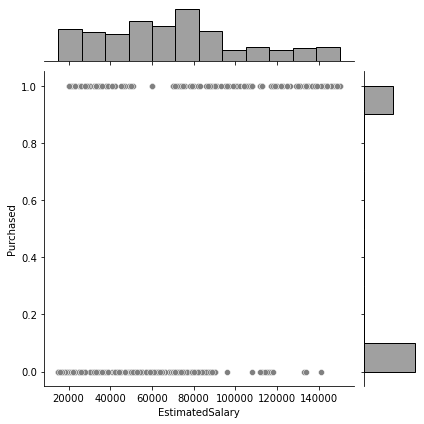

In [5]:
# sns.jointplot 활용한 시각화. x='EstimatedSalary', y='Purchased'

sns.jointplot(x='EstimatedSalary', y='Purchased', data = df, color = 'gray')

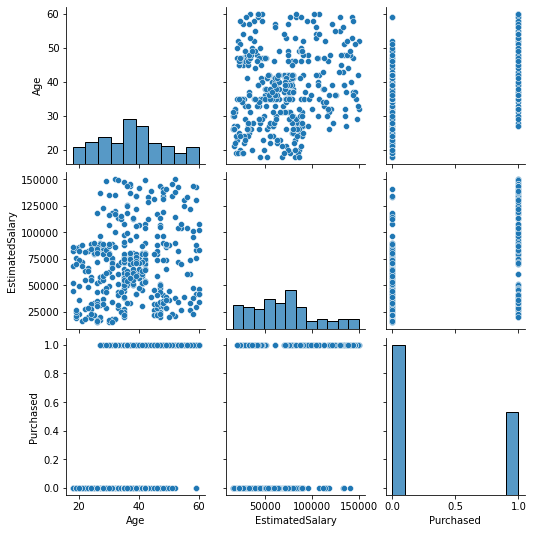

In [6]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [7]:
# X에 -1번째 column까지 할당 as np.array
# y에 -1번째 column을 할당 as np.array

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [9]:
# from sklearn.ensemble import AdaBoostClassifier
# classifier에 AdaBoostClassifier 할당
# param: n_estimators = 50
# n_estimator: The maximum number of estimators at which boosting is terminated.

# X_train, y_train으로 classifier에 fit

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [10]:
classifier.score(X_train, y_train)

0.928125

In [11]:
classifier.score(X_test, y_test)

0.925

In [12]:
# feature importances

classifier.feature_importances_

array([0.46, 0.54])

Feature ranking:
1. feature 1 (0.540000)
2. feature 0 (0.460000)


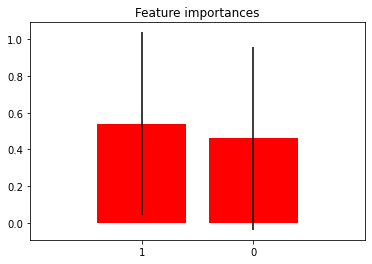

In [13]:
# feature importances: 어떤 변수가 불순도를 줄이는데 주요 역할을 했는지 알수 있다.
# 각각 의 노드에서 사용된 독립변수와, 그 결과로 얻은 information gain의 평균을 비교.
# # reference. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Step5: Predict value

189 10 13 108


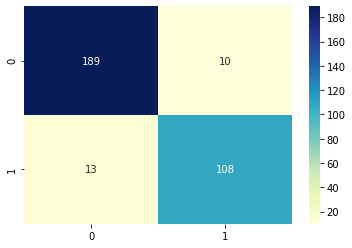

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

54 4 2 20


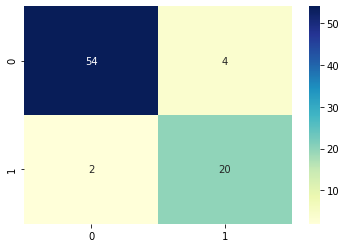

In [15]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [16]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label

---

## Exercise

Framingham Heart study dataset

#### Content

Dependent variable
- diabetes: 0 = No; 1 = Yes


Independent variables
- male: 0 = Female; 1 = Male
- age: Age at exam time.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: 0 = nonsmoker; 1 = smoker
- cigsPerDay: number of cigarettes smoked per day (estimated average)
- BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
- prevalentStroke: prevalentHyp
- totChol: mg/dL
- sysBP: mmHg
- diaBP: mmHg
- BMI: Body Mass Index calculated as: Weight (kg) / Height(meter-squared)
- heartRate: Beats/Min (Ventricular)
- glucose: mg/dL
- TenYearCHD

reference.
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

### Step1: Load Dataset

In [17]:
# 'framingham.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv('framingham.csv')
df.shape

(4240, 16)

In [18]:
# df head 행 보기

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
# df info 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [20]:
# df descriptive statistics

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [21]:
# drop null data dropna(how='any', axis=0)

df = df.dropna(how='any', axis=0)
df.shape

(3658, 16)

### Step2: Visualize Dataset

<AxesSubplot:>

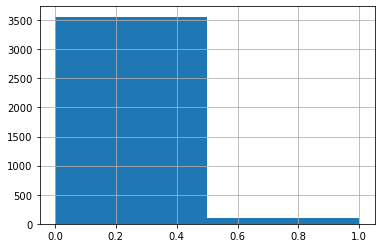

In [22]:
# histogram

df['diabetes'].hist(bins=2)

In [23]:
# value counts()

df.diabetes.value_counts()

0    3559
1      99
Name: diabetes, dtype: int64

### Step3: Define Train set and Test Set

In [24]:
# X에 diabetes를 제외한 column까지 할당. axis=1 기준.
# y에 diabetes column을 할당

X = df.drop('diabetes', axis=1)
y = df.loc[:, 'diabetes']

In [25]:
# split train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [26]:
# from sklearn.ensemble import AdaBoostClassifier
# classifier에 AdaBoostClassifier 할당
# param: n_estimators = 10, criterion = 'entropy'
# n_estimator: The number of trees in the forest.
# criterion: gini or entropy
# X_train, y_train으로 classifier에 fit

from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [27]:
classifier.score(X_train, y_train)

0.9839371155160629

In [28]:
classifier.score(X_test, y_test)

0.9863387978142076

Feature ranking:
1. feature 13 (0.240000)
2. feature 10 (0.240000)
3. feature 11 (0.100000)
4. feature 9 (0.100000)
5. feature 1 (0.100000)
6. feature 12 (0.060000)
7. feature 8 (0.040000)
8. feature 7 (0.040000)
9. feature 14 (0.020000)
10. feature 5 (0.020000)
11. feature 4 (0.020000)
12. feature 0 (0.020000)
13. feature 6 (0.000000)
14. feature 3 (0.000000)
15. feature 2 (0.000000)


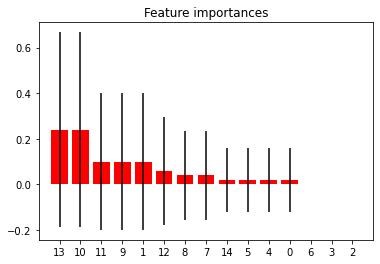

In [29]:
# feature importances: 어떤 변수가 성능을 높이는데 주요 역할을 했는지 알수 있다.
# 각각 의 노드에서 사용된 독립변수와, 그 결과로 얻은 information gain의 평균을 비교.
# reference. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Step5: Predict value

2840 10 37 39


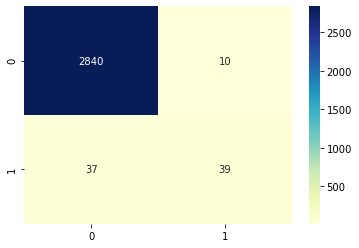

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

707 2 8 15


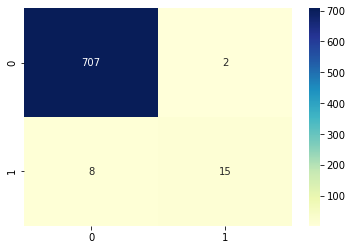

In [31]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [32]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       709
           1       0.88      0.65      0.75        23

    accuracy                           0.99       732
   macro avg       0.94      0.82      0.87       732
weighted avg       0.99      0.99      0.99       732

